In [1]:
import sys

IN_COLAB = "google.colab" in sys.modules
if IN_COLAB and branch == "stable":
    !pip install --quiet git+https://github.com/BayraktarLab/cell2location#egg=cell2location[tutorials]

import scanpy as sc
import anndata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import cell2location
import scvi

from matplotlib import rcParams
rcParams['pdf.fonttype'] = 42 # enables correct plotting of text
import seaborn as sns
import loompy

import pyreadr
import os

Global seed set to 0


In [2]:
import Ipynb_importer

In [3]:
import C2L_Ref

importing Jupyter notebook from C2L_Ref.ipynb


In [4]:
import C2L_Vis

importing Jupyter notebook from C2L_Vis.ipynb


In [5]:
path = '/data/xy/Spatial_transcriptome/eWEIDE/20231111_benchmark_recluster_Tex/scanpy_data/'
scpath = '/data/xy/Spatial_transcriptome/eWEIDE/20231111_benchmark_recluster_Tex/scanpy_data/'
output_path = '/data/xy/Spatial_transcriptome/eWEIDE/20231111_benchmark_recluster_Tex/cell2location_result/results/'
dirlist = ['TC', 'TM', 'TS']
dirlist

['TC', 'TM', 'TS']

In [6]:
# load the sc data (loom file) and transfer to h5ad file

adata_ref = sc.read_loom(f"{scpath}/sc.silico.loom", sparse=True, cleanup=False, X_name='spliced', obs_names='CellID', var_names='Gene', dtype='float32')
obs_ref= pd.read_csv(f'{scpath}/sc.silico_meta.data.csv',delimiter=',', index_col=0)
adata_ref.obs = obs_ref
var_ref= pd.read_csv(f'{scpath}/sc.silico_meta.features.csv',delimiter=',', index_col=0)
adata_ref.var = var_ref
adata_ref.write(f'{scpath}/sc.silico.h5ad')

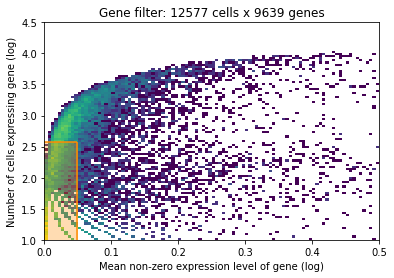

111
222


Anndata setup with scvi-tools version 0.16.0.

Setup via `RegressionModel.setup_anndata` with arguments:

{
│   'layer': None,
│   'batch_key': 'orig.ident',
│   'labels_key': 'low_res_ident',
│   'categorical_covariate_keys': ['orig.ident'],
│   'continuous_covariate_keys': None
}

         Summary Statistics         
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃     Summary Stat Key     ┃ Value ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│         n_cells          │ 12577 │
│          n_vars          │ 9639  │
│         n_batch          │   7   │
│         n_labels         │   7   │
│ n_extra_categorical_covs │   1   │
│ n_extra_continuous_covs  │   0   │
└──────────────────────────┴───────┘

                             Data Registry                             
┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Registry Key      ┃            scvi-tools Location             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           X            │                  adata.X                   │
│         batch          │          adata.obs['_scvi_batch']          │
│         labels         │         adata.obs['_scvi_labels']          │
│ extra_categorical_covs │ adata.obsm['_scvi_extra_categorical_covs'] │
│         ind_x          │           adata.obs['_indices']            │
└────────────────────────┴────────────────────────────────────────────┘

                           batch State Registry                            
┏━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃     Source Location     ┃       Categories        ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['orig.ident'] │     KRAS_Pt2_immune     │          0          │
│                         │     KRAS_Pt7_immune     │          1          │
│                         │ Pt2_Pt3_Pt6_CD45neg_add │          2          │
│                         │     Pt2_Pt3_Pt6_add     │          3          │
│                         │         Pt2_Pt6         │          4          │
│                         │     Pt3_Pt7_CD45neg     │          5          │
│                         │      WT_Pt3_immune      │          6          │
└─────────────────────────┴─────────────────────────┴─────────────────────┘

                       labels State Registry                        
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃      Source Location       ┃  Categories   ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['low_res_ident'] │    B_cells    │          0          │
│                            │     CD4_T     │          1          │
│                            │     CD8_T     │          2          │
│                            │  Epithelial   │          3          │
│                            │ Myeloid_cells │          4          │
│                            │    Plasma     │          5          │
│                            │    Stromal    │          6          │
└────────────────────────────┴───────────────┴─────────────────────┘

                   extra_categorical_covs State Registry                   
┏━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃     Source Location     ┃       Categories        ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['orig.ident'] │     KRAS_Pt2_immune     │          0          │
│                         │     KRAS_Pt7_immune     │          1          │
│                         │ Pt2_Pt3_Pt6_CD45neg_add │          2          │
│                         │     Pt2_Pt3_Pt6_add     │          3          │
│                         │         Pt2_Pt6         │          4          │
│                         │     Pt3_Pt7_CD45neg     │          5          │
│                         │      WT_Pt3_immune      │          6          │
│                         │                         │                     │
└─────────────────────────┴─────────────────────────┴─────────────────────┘

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/configuration_validator.py:120: UserWarning: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/data_loading.py:432: UserWarning: The number of training samples (6) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Sampling global variables, sample: 100%|██████████| 999/999 [00:13<00:00, 75.70it/s]


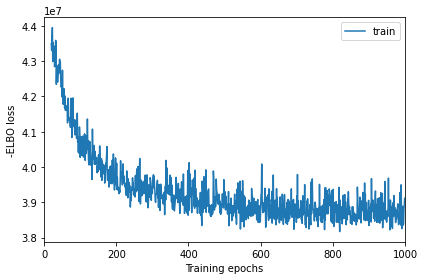

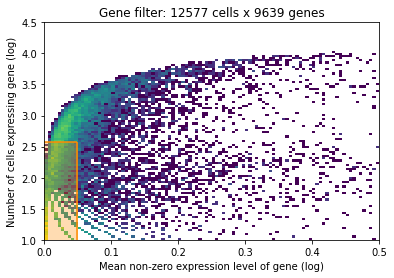

111
222


Anndata setup with scvi-tools version 0.16.0.

Setup via `RegressionModel.setup_anndata` with arguments:

{
│   'layer': None,
│   'batch_key': 'orig.ident',
│   'labels_key': 'med_res_ident',
│   'categorical_covariate_keys': ['orig.ident'],
│   'continuous_covariate_keys': None
}

         Summary Statistics         
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃     Summary Stat Key     ┃ Value ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│         n_cells          │ 12577 │
│          n_vars          │ 9639  │
│         n_batch          │   7   │
│         n_labels         │  11   │
│ n_extra_categorical_covs │   1   │
│ n_extra_continuous_covs  │   0   │
└──────────────────────────┴───────┘

                             Data Registry                             
┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Registry Key      ┃            scvi-tools Location             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           X            │                  adata.X                   │
│         batch          │          adata.obs['_scvi_batch']          │
│         labels         │         adata.obs['_scvi_labels']          │
│ extra_categorical_covs │ adata.obsm['_scvi_extra_categorical_covs'] │
│         ind_x          │           adata.obs['_indices']            │
└────────────────────────┴────────────────────────────────────────────┘

                           batch State Registry                            
┏━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃     Source Location     ┃       Categories        ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['orig.ident'] │     KRAS_Pt2_immune     │          0          │
│                         │     KRAS_Pt7_immune     │          1          │
│                         │ Pt2_Pt3_Pt6_CD45neg_add │          2          │
│                         │     Pt2_Pt3_Pt6_add     │          3          │
│                         │         Pt2_Pt6         │          4          │
│                         │     Pt3_Pt7_CD45neg     │          5          │
│                         │      WT_Pt3_immune      │          6          │
└─────────────────────────┴─────────────────────────┴─────────────────────┘

                           labels State Registry                           
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃      Source Location       ┃      Categories      ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['med_res_ident'] │         B_GC         │          0          │
│                            │      CD4_T_CCR7      │          1          │
│                            │       CD4_Treg       │          2          │
│                            │        CD8_T         │          3          │
│                            │      Epithelial      │          4          │
│                            │         Mast         │          5          │
│                            │    Myeloid_cells     │          6          │
│                            │          NK          │          7          │
│                            │        Plasma        │          8          │
│                            │       Stromal        │          9          │
│                            │ memory_naive_B_cells │         10          │
└────────────────────────────┴──────────────────────┴─────────────────────┘

                   extra_categorical_covs State Registry                   
┏━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃     Source Location     ┃       Categories        ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['orig.ident'] │     KRAS_Pt2_immune     │          0          │
│                         │     KRAS_Pt7_immune     │          1          │
│                         │ Pt2_Pt3_Pt6_CD45neg_add │          2          │
│                         │     Pt2_Pt3_Pt6_add     │          3          │
│                         │         Pt2_Pt6         │          4          │
│                         │     Pt3_Pt7_CD45neg     │          5          │
│                         │      WT_Pt3_immune      │          6          │
│                         │                         │                     │
└─────────────────────────┴─────────────────────────┴─────────────────────┘

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/configuration_validator.py:120: UserWarning: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/data_loading.py:432: UserWarning: The number of training samples (6) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Sampling global variables, sample: 100%|██████████| 999/999 [00:13<00:00, 73.90it/s]


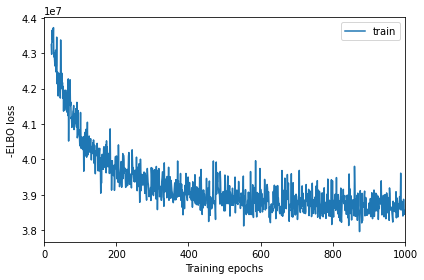

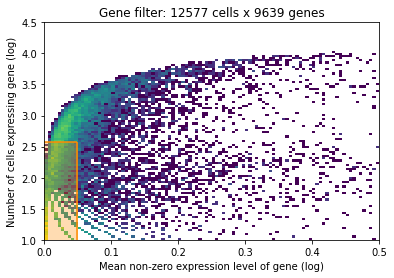

111
222


Anndata setup with scvi-tools version 0.16.0.

Setup via `RegressionModel.setup_anndata` with arguments:

{
│   'layer': None,
│   'batch_key': 'orig.ident',
│   'labels_key': 'high_res_ident',
│   'categorical_covariate_keys': ['orig.ident'],
│   'continuous_covariate_keys': None
}

         Summary Statistics         
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃     Summary Stat Key     ┃ Value ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│         n_cells          │ 12577 │
│          n_vars          │ 9639  │
│         n_batch          │   7   │
│         n_labels         │  20   │
│ n_extra_categorical_covs │   1   │
│ n_extra_continuous_covs  │   0   │
└──────────────────────────┴───────┘

                             Data Registry                             
┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Registry Key      ┃            scvi-tools Location             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           X            │                  adata.X                   │
│         batch          │          adata.obs['_scvi_batch']          │
│         labels         │         adata.obs['_scvi_labels']          │
│ extra_categorical_covs │ adata.obsm['_scvi_extra_categorical_covs'] │
│         ind_x          │           adata.obs['_indices']            │
└────────────────────────┴────────────────────────────────────────────┘

                           batch State Registry                            
┏━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃     Source Location     ┃       Categories        ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['orig.ident'] │     KRAS_Pt2_immune     │          0          │
│                         │     KRAS_Pt7_immune     │          1          │
│                         │ Pt2_Pt3_Pt6_CD45neg_add │          2          │
│                         │     Pt2_Pt3_Pt6_add     │          3          │
│                         │         Pt2_Pt6         │          4          │
│                         │     Pt3_Pt7_CD45neg     │          5          │
│                         │      WT_Pt3_immune      │          6          │
└─────────────────────────┴─────────────────────────┴─────────────────────┘

                        labels State Registry                        
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃       Source Location       ┃  Categories   ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['high_res_ident'] │     B_GC      │          0          │
│                             │ B_memory_like │          1          │
│                             │ B_naive_like  │          2          │
│                             │  CD4_T_CCR7   │          3          │
│                             │    CD4_Tfh    │          4          │
│                             │   CD4_Treg    │          5          │
│                             │    CD8_Tem    │          6          │
│                             │    CD8_Tex    │          7          │
│                             │    CD8_Trm    │          8          │
│                             │      DC       │          9          │
│                             │ Epithelial_c1 │         10          │
│                             │ Epithelial_c2 │         11          │
│                             │  Macrophage   │         12          │
│                             │     Mast      │         13          │
│                             │   Monocyte    │         14          │
│                             │      NK       │         15          │
│                             │    Plasma     │         16          │
│                             │  Stromal_c1   │         17          │
│                             │  Stromal_c2   │         18          │
│                             │      pDC      │         19          │
└─────────────────────────────┴───────────────┴─────────────────────┘

                   extra_categorical_covs State Registry                   
┏━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃     Source Location     ┃       Categories        ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['orig.ident'] │     KRAS_Pt2_immune     │          0          │
│                         │     KRAS_Pt7_immune     │          1          │
│                         │ Pt2_Pt3_Pt6_CD45neg_add │          2          │
│                         │     Pt2_Pt3_Pt6_add     │          3          │
│                         │         Pt2_Pt6         │          4          │
│                         │     Pt3_Pt7_CD45neg     │          5          │
│                         │      WT_Pt3_immune      │          6          │
│                         │                         │                     │
└─────────────────────────┴─────────────────────────┴─────────────────────┘

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/configuration_validator.py:120: UserWarning: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/data_loading.py:432: UserWarning: The number of training samples (6) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Sampling global variables, sample: 100%|██████████| 999/999 [00:13<00:00, 74.57it/s]


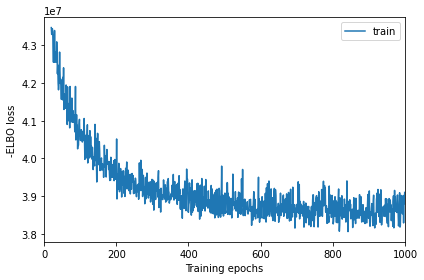

In [7]:
adata_ref = sc.read_h5ad(f'{scpath}/sc.silico.h5ad')
# preprocess the sc data
adata_ref_lowres = C2L_Ref.Preprocess(adata_ref,output_path,'low_res_ident')
adata_ref_medres = C2L_Ref.Preprocess(adata_ref,output_path,'med_res_ident')
adata_ref_highres = C2L_Ref.Preprocess(adata_ref,output_path,'high_res_ident')

In [8]:
for i in dirlist:
    # check the filename
    dirlist2 = os.listdir(f'{path}{i}/')

    for j in dirlist2:
        print(j)
        suffix = j[-5]
        adata_vis = C2L_Vis.Process(adata_ref_lowres,path,output_path,i,suffix,j)
        adata_vis.obs[adata_vis.uns['mod']['factor_names']] = adata_vis.obsm['q05_cell_abundance_w_sf']
        outdf = adata_vis.obs[adata_vis.uns['mod']['factor_names']]
        outdf.to_csv(f"{output_path}{i}_simu_{suffix}_lowres.csv")
        
        adata_vis = C2L_Vis.Process(adata_ref_medres,path,output_path,i,suffix,j)
        adata_vis.obs[adata_vis.uns['mod']['factor_names']] = adata_vis.obsm['q05_cell_abundance_w_sf']
        outdf = adata_vis.obs[adata_vis.uns['mod']['factor_names']]
        outdf.to_csv(f"{output_path}{i}_simu_{suffix}_medres.csv")
        
        adata_vis = C2L_Vis.Process(adata_ref_highres,path,output_path,i,suffix,j)
        adata_vis.obs[adata_vis.uns['mod']['factor_names']] = adata_vis.obsm['q05_cell_abundance_w_sf']
        outdf = adata_vis.obs[adata_vis.uns['mod']['factor_names']]
        outdf.to_csv(f"{output_path}{i}_simu_{suffix}_highres.csv")

simu_TC_1.rds


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/configuration_validator.py:120: UserWarning: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/data_loading.py:432: UserWarning: The number of training samples (1) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Sampling global variables, sample: 100%|██████████| 999/999 [00:19<00:00, 52.30it/s]


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/configuration_validator.py:120: UserWarning: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/data_loading.py:432: UserWarning: The number of training samples (1) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Sampling global variables, sample: 100%|██████████| 999/999 [00:13<00:00, 72.28it/s]


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/configuration_validator.py:120: UserWarning: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/data_loading.py:432: UserWarning: The number of training samples (1) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Sampling global variables, sample: 100%|██████████| 999/999 [00:14<00:00, 70.60it/s]


GPU available: True, used: True
TPU available: False, using: 0 TPU cores


simu_TC_2.rds


IPU available: False, using: 0 IPUs
/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/configuration_validator.py:120: UserWarning: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/data_loading.py:432: UserWarning: The number of training samples (1) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Sampling global variables, sample: 100%|██████████| 999/999 [00:13<00:00, 71.52it/s]


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/configuration_validator.py:120: UserWarning: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/data_loading.py:432: UserWarning: The number of training samples (1) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Sampling global variables, sample: 100%|██████████| 999/999 [00:19<00:00, 50.58it/s]


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/configuration_validator.py:120: UserWarning: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/data_loading.py:432: UserWarning: The number of training samples (1) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Sampling global variables, sample: 100%|██████████| 999/999 [00:15<00:00, 64.43it/s]


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/configuration_validator.py:120: UserWarning: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


simu_TC_3.rds


/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/data_loading.py:432: UserWarning: The number of training samples (1) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Sampling global variables, sample: 100%|██████████| 999/999 [00:14<00:00, 69.28it/s]


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/configuration_validator.py:120: UserWarning: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/data_loading.py:432: UserWarning: The number of training samples (1) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Sampling global variables, sample: 100%|██████████| 999/999 [00:14<00:00, 70.59it/s]


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/configuration_validator.py:120: UserWarning: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/data_loading.py:432: UserWarning: The number of training samples (1) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Sampling global variables, sample: 100%|██████████| 999/999 [00:13<00:00, 72.64it/s]


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/configuration_validator.py:120: UserWarning: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


simu_TC_4.rds


/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/data_loading.py:432: UserWarning: The number of training samples (1) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Sampling global variables, sample: 100%|██████████| 999/999 [00:13<00:00, 71.95it/s]


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/configuration_validator.py:120: UserWarning: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/data_loading.py:432: UserWarning: The number of training samples (1) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Sampling global variables, sample: 100%|██████████| 999/999 [00:13<00:00, 72.01it/s]


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/configuration_validator.py:120: UserWarning: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/data_loading.py:432: UserWarning: The number of training samples (1) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Sampling global variables, sample: 100%|██████████| 999/999 [00:13<00:00, 71.69it/s]


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/configuration_validator.py:120: UserWarning: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/data_loading.py:432: UserWarning: The number of training samples (1) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


simu_TC_5.rds
Sampling global variables, sample: 100%|██████████| 999/999 [00:13<00:00, 72.92it/s]


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/configuration_validator.py:120: UserWarning: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/data_loading.py:432: UserWarning: The number of training samples (1) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Sampling global variables, sample: 100%|██████████| 999/999 [00:13<00:00, 72.98it/s]


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/configuration_validator.py:120: UserWarning: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/data_loading.py:432: UserWarning: The number of training samples (1) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Sampling global variables, sample: 100%|██████████| 999/999 [00:13<00:00, 72.84it/s]


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


simu_TM_1.rds


/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/configuration_validator.py:120: UserWarning: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/data_loading.py:432: UserWarning: The number of training samples (1) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Sampling global variables, sample: 100%|██████████| 999/999 [00:13<00:00, 73.62it/s]


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/configuration_validator.py:120: UserWarning: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/data_loading.py:432: UserWarning: The number of training samples (1) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Sampling global variables, sample: 100%|██████████| 999/999 [00:13<00:00, 71.48it/s]


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/configuration_validator.py:120: UserWarning: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/data_loading.py:432: UserWarning: The number of training samples (1) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Sampling global variables, sample: 100%|██████████| 999/999 [00:13<00:00, 73.77it/s]


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/configuration_validator.py:120: UserWarning: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/data_loading.py:432: UserWarning: The number of training samples (1) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


simu_TM_2.rds
Sampling global variables, sample: 100%|██████████| 999/999 [00:13<00:00, 71.53it/s]


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/configuration_validator.py:120: UserWarning: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/data_loading.py:432: UserWarning: The number of training samples (1) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Sampling global variables, sample: 100%|██████████| 999/999 [00:13<00:00, 73.66it/s]


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/configuration_validator.py:120: UserWarning: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/data_loading.py:432: UserWarning: The number of training samples (1) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Sampling global variables, sample: 100%|██████████| 999/999 [00:13<00:00, 73.30it/s]


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/configuration_validator.py:120: UserWarning: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


simu_TM_3.rds


/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/data_loading.py:432: UserWarning: The number of training samples (1) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Sampling global variables, sample: 100%|██████████| 999/999 [00:13<00:00, 73.04it/s]


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/configuration_validator.py:120: UserWarning: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/data_loading.py:432: UserWarning: The number of training samples (1) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Epoch 30000/30000: 100%|██████████| 30000/30000 [25:40<00:00, 19.48it/s, v_num=1, elbo_train=5.3e+5] 


/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/cell2location/models/base/_pyro_mixin.py:369: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.


Sampling global variables, sample: 100%|██████████| 999/999 [00:13<00:00, 72.08it/s]


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/configuration_validator.py:120: UserWarning: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/data_loading.py:432: UserWarning: The number of training samples (1) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Epoch 30000/30000: 100%|██████████| 30000/30000 [27:21<00:00, 18.27it/s, v_num=1, elbo_train=5.26e+5]


/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/cell2location/models/base/_pyro_mixin.py:369: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.


Sampling global variables, sample: 100%|██████████| 999/999 [00:15<00:00, 66.08it/s]


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/configuration_validator.py:120: UserWarning: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


simu_TM_4.rds


/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/data_loading.py:432: UserWarning: The number of training samples (1) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Epoch 30000/30000: 100%|██████████| 30000/30000 [26:32<00:00, 18.83it/s, v_num=1, elbo_train=5.19e+5]


/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/cell2location/models/base/_pyro_mixin.py:369: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.


Sampling global variables, sample: 100%|██████████| 999/999 [00:13<00:00, 72.04it/s]


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/configuration_validator.py:120: UserWarning: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/data_loading.py:432: UserWarning: The number of training samples (1) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Epoch 30000/30000: 100%|██████████| 30000/30000 [26:16<00:00, 19.03it/s, v_num=1, elbo_train=5.19e+5]


/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/cell2location/models/base/_pyro_mixin.py:369: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.


Sampling global variables, sample: 100%|██████████| 999/999 [00:14<00:00, 70.88it/s]


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/configuration_validator.py:120: UserWarning: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/data_loading.py:432: UserWarning: The number of training samples (1) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Epoch 30000/30000: 100%|██████████| 30000/30000 [26:42<00:00, 18.72it/s, v_num=1, elbo_train=5.16e+5]


/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/cell2location/models/base/_pyro_mixin.py:369: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.


Sampling global variables, sample: 100%|██████████| 999/999 [00:15<00:00, 63.97it/s]


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/configuration_validator.py:120: UserWarning: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


simu_TM_5.rds


/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/data_loading.py:432: UserWarning: The number of training samples (1) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Epoch 30000/30000: 100%|██████████| 30000/30000 [29:12<00:00, 17.12it/s, v_num=1, elbo_train=5.19e+5]


/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/cell2location/models/base/_pyro_mixin.py:369: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.


Sampling global variables, sample: 100%|██████████| 999/999 [00:18<00:00, 52.77it/s]


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/configuration_validator.py:120: UserWarning: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/data_loading.py:432: UserWarning: The number of training samples (1) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Epoch 30000/30000: 100%|██████████| 30000/30000 [33:52<00:00, 14.76it/s, v_num=1, elbo_train=5.19e+5]


/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/cell2location/models/base/_pyro_mixin.py:369: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.


Sampling global variables, sample: 100%|██████████| 999/999 [00:18<00:00, 52.74it/s]


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/configuration_validator.py:120: UserWarning: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/data_loading.py:432: UserWarning: The number of training samples (1) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Epoch 30000/30000: 100%|██████████| 30000/30000 [36:07<00:00, 13.84it/s, v_num=1, elbo_train=5.15e+5]


/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/cell2location/models/base/_pyro_mixin.py:369: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.


Sampling global variables, sample: 100%|██████████| 999/999 [00:17<00:00, 56.75it/s]
simu_TS_1.rds


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/configuration_validator.py:120: UserWarning: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/data_loading.py:432: UserWarning: The number of training samples (1) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Epoch 30000/30000: 100%|██████████| 30000/30000 [33:54<00:00, 14.75it/s, v_num=1, elbo_train=4.96e+5]


/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/cell2location/models/base/_pyro_mixin.py:369: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.


Sampling global variables, sample: 100%|██████████| 999/999 [00:16<00:00, 61.52it/s]


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/configuration_validator.py:120: UserWarning: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/data_loading.py:432: UserWarning: The number of training samples (1) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Epoch 30000/30000: 100%|██████████| 30000/30000 [31:10<00:00, 16.04it/s, v_num=1, elbo_train=4.95e+5]


/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/cell2location/models/base/_pyro_mixin.py:369: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.


Sampling global variables, sample: 100%|██████████| 999/999 [00:15<00:00, 64.08it/s]


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/configuration_validator.py:120: UserWarning: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/data_loading.py:432: UserWarning: The number of training samples (1) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Epoch 30000/30000: 100%|██████████| 30000/30000 [35:05<00:00, 14.25it/s, v_num=1, elbo_train=4.92e+5]


/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/cell2location/models/base/_pyro_mixin.py:369: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.


Sampling global variables, sample: 100%|██████████| 999/999 [00:15<00:00, 65.54it/s]
simu_TS_2.rds


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/configuration_validator.py:120: UserWarning: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/data_loading.py:432: UserWarning: The number of training samples (1) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Epoch 30000/30000: 100%|██████████| 30000/30000 [30:35<00:00, 16.35it/s, v_num=1, elbo_train=4.87e+5]


/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/cell2location/models/base/_pyro_mixin.py:369: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.


Sampling global variables, sample: 100%|██████████| 999/999 [00:16<00:00, 60.88it/s]


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/configuration_validator.py:120: UserWarning: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/data_loading.py:432: UserWarning: The number of training samples (1) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Epoch 9791/30000:  33%|███▎      | 9790/30000 [09:50<22:38, 14.88it/s, v_num=1, elbo_train=4.87e+5]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 27894/30000:  93%|█████████▎| 27893/30000 [27:50<02:02, 17.16it/s, v_num=1, elbo_train=4.86e+5]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 1119/30000:   4%|▎         | 1119/30000 [01:08<27:41, 17.38it/s, v_num=1, elbo_train=5.13e+5]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 10458/30000:  35%|███▍      | 10457/30000 [10:36<16:56, 19.23it/s, v_num=1, elbo_train=4.84e+5]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 16904/30000:  56%|█████▋    | 16903/30000 [16:31<12:13, 17.85it/s, v_num=1, elbo_train=4.83e+5]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 22370/30000:  75%|███████▍  | 22370/30000 [21:51<06:48, 18.70it/s, v_num=1, elbo_train=4.83e+5]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 28077/30000:  94%|█████████▎| 28077/30000 [27:19<01:47, 17.84it/s, v_num=1, elbo_train=4.83e+5]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Sampling global variables, sample: 100%|██████████| 999/999 [00:14<00:00, 69.52it/s]


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/configuration_validator.py:120: UserWarning: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/data_loading.py:432: UserWarning: The number of training samples (1) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


simu_TS_3.rds
Epoch 18871/30000:  63%|██████▎   | 18871/30000 [17:49<09:41, 19.15it/s, v_num=1, elbo_train=4.86e+5]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 24801/30000:  83%|████████▎ | 24800/30000 [23:14<04:49, 17.97it/s, v_num=1, elbo_train=4.86e+5]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 30000/30000: 100%|██████████| 30000/30000 [28:05<00:00, 17.80it/s, v_num=1, elbo_train=4.86e+5]


/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/cell2location/models/base/_pyro_mixin.py:369: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.


Sampling global variables, sample: 100%|██████████| 999/999 [00:14<00:00, 70.97it/s]


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/configuration_validator.py:120: UserWarning: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/data_loading.py:432: UserWarning: The number of training samples (1) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Epoch 11055/30000:  37%|███▋      | 11054/30000 [10:28<25:31, 12.37it/s, v_num=1, elbo_train=4.86e+5]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 16715/30000:  56%|█████▌    | 16715/30000 [16:30<13:05, 16.91it/s, v_num=1, elbo_train=4.86e+5]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 30000/30000: 100%|██████████| 30000/30000 [30:48<00:00, 16.23it/s, v_num=1, elbo_train=4.86e+5]


/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/cell2location/models/base/_pyro_mixin.py:369: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.


Sampling global variables, sample: 100%|██████████| 999/999 [00:15<00:00, 65.38it/s]


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/configuration_validator.py:120: UserWarning: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/data_loading.py:432: UserWarning: The number of training samples (1) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Epoch 3166/30000:  11%|█         | 3165/30000 [03:13<26:14, 17.05it/s, v_num=1, elbo_train=4.91e+5]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 7688/30000:  26%|██▌       | 7688/30000 [07:47<22:39, 16.41it/s, v_num=1, elbo_train=4.84e+5]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 8758/30000:  29%|██▉       | 8758/30000 [08:52<20:56, 16.91it/s, v_num=1, elbo_train=4.84e+5]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 20056/30000:  67%|██████▋   | 20055/30000 [20:07<10:20, 16.04it/s, v_num=1, elbo_train=4.84e+5]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 25503/30000:  85%|████████▌ | 25502/30000 [25:43<04:22, 17.14it/s, v_num=1, elbo_train=4.84e+5]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 30000/30000: 100%|██████████| 30000/30000 [30:15<00:00, 16.52it/s, v_num=1, elbo_train=4.83e+5]


/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/cell2location/models/base/_pyro_mixin.py:369: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.


Sampling global variables, sample: 100%|██████████| 999/999 [00:15<00:00, 65.08it/s]
simu_TS_4.rds


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/configuration_validator.py:120: UserWarning: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/data_loading.py:432: UserWarning: The number of training samples (1) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Epoch 4253/30000:  14%|█▍        | 4252/30000 [04:13<26:25, 16.24it/s, v_num=1, elbo_train=5.05e+5]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 9476/30000:  32%|███▏      | 9475/30000 [09:00<19:16, 17.74it/s, v_num=1, elbo_train=5.01e+5]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 15241/30000:  51%|█████     | 15240/30000 [14:33<15:02, 16.36it/s, v_num=1, elbo_train=5e+5]   

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 22806/30000:  76%|███████▌  | 22805/30000 [21:45<06:24, 18.71it/s, v_num=1, elbo_train=5e+5]   

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 27940/30000:  93%|█████████▎| 27940/30000 [26:30<01:55, 17.88it/s, v_num=1, elbo_train=5e+5]   

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 30000/30000: 100%|██████████| 30000/30000 [28:22<00:00, 17.62it/s, v_num=1, elbo_train=5e+5]   


/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/cell2location/models/base/_pyro_mixin.py:369: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.


Epoch 2563/30000:   9%|▊         | 2562/30000 [02:15<24:29, 18.67it/s, v_num=1, elbo_train=5.11e+5]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 10765/30000:  36%|███▌      | 10764/30000 [09:53<17:58, 17.84it/s, v_num=1, elbo_train=5e+5]   

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 16558/30000:  55%|█████▌    | 16558/30000 [15:09<12:03, 18.58it/s, v_num=1, elbo_train=5e+5]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 22325/30000:  74%|███████▍  | 22325/30000 [20:29<07:05, 18.02it/s, v_num=1, elbo_train=5e+5]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 27299/30000:  91%|█████████ | 27298/30000 [25:14<02:27, 18.30it/s, v_num=1, elbo_train=5e+5]   

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 28216/30000:  94%|█████████▍| 28216/30000 [26:07<01:42, 17.43it/s, v_num=1, elbo_train=5e+5]   

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 3146/30000:  10%|█         | 3146/30000 [02:54<25:04, 17.85it/s, v_num=1, elbo_train=5.04e+5]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 4080/30000:  14%|█▎        | 4080/30000 [03:45<22:26, 19.25it/s, v_num=1, elbo_train=5.02e+5]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 8730/30000:  29%|██▉       | 8730/30000 [07:59<19:50, 17.87it/s, v_num=1, elbo_train=4.98e+5]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 9566/30000:  32%|███▏      | 9565/30000 [08:45<19:36, 17.37it/s, v_num=1, elbo_train=4.98e+5]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 14392/30000:  48%|████▊     | 14392/30000 [13:10<14:19, 18.16it/s, v_num=1, elbo_train=4.97e+5]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 15241/30000:  51%|█████     | 15241/30000 [13:56<13:25, 18.32it/s, v_num=1, elbo_train=4.97e+5]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 19639/30000:  65%|██████▌   | 19639/30000 [17:54<09:30, 18.15it/s, v_num=1, elbo_train=4.97e+5]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 20871/30000:  70%|██████▉   | 20871/30000 [19:01<08:05, 18.79it/s, v_num=1, elbo_train=4.97e+5]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 25233/30000:  84%|████████▍ | 25233/30000 [23:01<04:16, 18.61it/s, v_num=1, elbo_train=4.97e+5]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 26468/30000:  88%|████████▊ | 26468/30000 [24:09<03:07, 18.81it/s, v_num=1, elbo_train=4.97e+5]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 820/30000:   3%|▎         | 820/30000 [00:45<28:39, 16.97it/s, v_num=1, elbo_train=5.48e+5]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 2058/30000:   7%|▋         | 2058/30000 [01:57<27:16, 17.08it/s, v_num=1, elbo_train=5.18e+5]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 6489/30000:  22%|██▏       | 6489/30000 [06:09<22:57, 17.06it/s, v_num=1, elbo_train=5.06e+5]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 7732/30000:  26%|██▌       | 7731/30000 [07:20<19:17, 19.24it/s, v_num=1, elbo_train=5.05e+5]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 12113/30000:  40%|████      | 12113/30000 [11:08<15:15, 19.53it/s, v_num=1, elbo_train=5.05e+5]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 13365/30000:  45%|████▍     | 13364/30000 [12:15<14:02, 19.76it/s, v_num=1, elbo_train=5.05e+5]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 17269/30000:  58%|█████▊    | 17269/30000 [15:43<10:50, 19.56it/s, v_num=1, elbo_train=5.05e+5]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 18974/30000:  63%|██████▎   | 18973/30000 [17:13<09:36, 19.12it/s, v_num=1, elbo_train=5.05e+5]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 22922/30000:  76%|███████▋  | 22922/30000 [20:50<06:32, 18.03it/s, v_num=1, elbo_train=5.05e+5]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 24655/30000:  82%|████████▏ | 24655/30000 [22:23<04:58, 17.93it/s, v_num=1, elbo_train=5.05e+5]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 28557/30000:  95%|█████████▌| 28556/30000 [25:58<01:19, 18.10it/s, v_num=1, elbo_train=5.05e+5]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 30000/30000: 100%|██████████| 30000/30000 [27:18<00:00, 18.31it/s, v_num=1, elbo_train=5.05e+5]


/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/cell2location/models/base/_pyro_mixin.py:369: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.


Sampling global variables, sample: 100%|██████████| 999/999 [00:14<00:00, 69.13it/s]


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/configuration_validator.py:120: UserWarning: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/data/xy/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/data_loading.py:432: UserWarning: The number of training samples (1) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Epoch 214/30000:   1%|          | 214/30000 [00:11<25:56, 19.13it/s, v_num=1, elbo_train=6.23e+5]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 4118/30000:  14%|█▎        | 4118/30000 [03:41<24:17, 17.76it/s, v_num=1, elbo_train=5.09e+5]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 5825/30000:  19%|█▉        | 5825/30000 [05:13<21:35, 18.66it/s, v_num=1, elbo_train=5.06e+5]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 12543/30000:  42%|████▏     | 12542/30000 [11:13<14:41, 19.81it/s, v_num=1, elbo_train=5.04e+5]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 18237/30000:  61%|██████    | 18237/30000 [16:17<10:31, 18.63it/s, v_num=1, elbo_train=5.04e+5]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 23698/30000:  79%|███████▉  | 23697/30000 [21:10<05:27, 19.25it/s, v_num=1, elbo_train=5.04e+5]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 29458/30000:  98%|█████████▊| 29457/30000 [26:14<00:29, 18.54it/s, v_num=1, elbo_train=5.04e+5]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 4865/30000:  16%|█▌        | 4864/30000 [04:53<25:04, 16.71it/s, v_num=1, elbo_train=5.04e+5]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 10535/30000:  35%|███▌      | 10535/30000 [10:21<16:30, 19.65it/s, v_num=1, elbo_train=5.02e+5]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 15439/30000:  51%|█████▏    | 15439/30000 [14:38<12:24, 19.56it/s, v_num=1, elbo_train=5.01e+5]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 22083/30000:  74%|███████▎  | 22082/30000 [20:28<07:00, 18.85it/s, v_num=1, elbo_train=5.01e+5]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 29553/30000:  99%|█████████▊| 29552/30000 [26:59<00:23, 19.30it/s, v_num=1, elbo_train=5.01e+5]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
i = 'HL'
# check the filename
dirlist2 = os.listdir(f'{path}{i}/')
# load the sc data (loom file) and transfer to h5ad file
adata_ref = sc.read_loom(f"{scpath}/sc_{i}.loom", sparse=True, cleanup=False, X_name='spliced', obs_names='CellID', var_names='Gene', dtype='float32')
obs_ref= pd.read_csv(f'{scpath}/sc_{i}_meta.data.csv',delimiter=',', index_col=0)
adata_ref.obs = obs_ref
var_ref= pd.read_csv(f'{scpath}/sc_{i}_meta.features.csv',delimiter=',', index_col=0)
adata_ref.var = var_ref
adata_ref.write(f'{scpath}/sc_{i}.h5ad')
# preprocess the sc data
adata_ref = C2L_Ref.Preprocess(adata_ref,output_path,i)
for j in dirlist2:
    print(j)
    suffix = j[-5]
    adata_vis = C2L_Vis.Process(adata_ref,path,output_path,i,suffix,j)
    adata_vis.obs[adata_vis.uns['mod']['factor_names']] = adata_vis.obsm['q05_cell_abundance_w_sf']
    outdf = adata_vis.obs[adata_vis.uns['mod']['factor_names']]
    outdf.to_csv(f"{output_path}{i}_simu_{suffix}.csv")

In [ ]:
i = 'stxB'
# check the filename
dirlist2 = os.listdir(f'{path}{i}/')
# load the sc data (loom file) and transfer to h5ad file
adata_ref = sc.read_loom(f"{scpath}/sc_{i}.loom", sparse=True, cleanup=False, X_name='spliced', obs_names='CellID', var_names='Gene', dtype='float32')
obs_ref= pd.read_csv(f'{scpath}/sc_{i}_meta.data.csv',delimiter=',', index_col=0)
adata_ref.obs = obs_ref
var_ref= pd.read_csv(f'{scpath}/sc_{i}_meta.features.csv',delimiter=',', index_col=0)
adata_ref.var = var_ref
adata_ref.write(f'{scpath}/sc_{i}.h5ad')
# preprocess the sc data
adata_ref = C2L_Ref.Preprocess(adata_ref,output_path,i)
for j in dirlist2:
    print(j)
    suffix = j[-5]
    adata_vis = C2L_Vis.Process(adata_ref,path,output_path,i,suffix,j)
    adata_vis.obs[adata_vis.uns['mod']['factor_names']] = adata_vis.obsm['q05_cell_abundance_w_sf']
    outdf = adata_vis.obs[adata_vis.uns['mod']['factor_names']]
    outdf.to_csv(f"{output_path}{i}_simu_{suffix}.csv")

## Test data

In [ ]:
i = 'HL'
adata_ref = sc.read_h5ad(f'{output_path}sc_{i}.h5ad')
dirlist2 = os.listdir(f'{path}{i}/')
j = dirlist2[0]
print(j)
suffix = j[-5]
adata_vis = C2L_Vis.Process(adata_ref,path,output_path,i,suffix,j)
adata_vis.obs[adata_vis.uns['mod']['factor_names']] = adata_vis.obsm['q05_cell_abundance_w_sf']
outdf = adata_vis.obs[adata_vis.uns['mod']['factor_names']]
outdf.to_csv(f"{output_path}{i}_simu_{suffix}.csv")

In [ ]:
outdf.to_csv(f"{output_path}{i}_simu_{suffix}.csv")

In [ ]:
adata_ref

In [ ]:
i = 'KRAS'

adata_ref = sc.read_loom(f"{scpath}sc_{i}.loom", sparse=True, cleanup=False, X_name='spliced', obs_names='CellID', var_names='Gene', dtype='float32')
obs_ref= pd.read_csv(f'{scpath}sc_{i}_meta.data.csv',delimiter=',', index_col=0)
adata_ref.obs = obs_ref
var_ref= pd.read_csv(f'{scpath}sc_{i}_meta.features.csv',delimiter=',', index_col=0)
adata_ref.var = var_ref
adata_ref.write(f'{scpath}sc_{i}.h5ad')
adata_ref = C2L_Ref.Preprocess(adata_ref,output_path,i)

In [ ]:
result = pyreadr.read_r('/data/xy/Spatial_transcriptome/eWEIDE/20220510_benchmark/simulated_data/ForPython/KRAS/simulatData_KRAS_1.rds')
df = result[None]
df2 = df.T
df2

In [ ]:
n_obs = len(df2.index.values)
obs = pd.DataFrame()
obs['orig.ident'] = np.random.choice(['simulated_data'], n_obs)
obs['sample'] = np.random.choice(['KRAS'], n_obs)
obs.index = df2.index.values

var_names = df2.columns.values
n_vars = len(var_names)
var = pd.DataFrame(index=var_names)

adata_vis = anndata.AnnData(df2, obs=obs, var=var, dtype='int32')
adata_vis

In [ ]:
adata_vis.var['SYMBOL'] = adata_vis.var_names
adata_vis.var['gene_ids'] = adata_vis.var_names
adata_vis.var_names.name = None

# find mitochondria-encoded (MT) genes
adata_vis.var['MT_gene'] = [gene.startswith('MT-') for gene in adata_vis.var['SYMBOL']]

# remove MT genes for spatial mapping (keeping their counts in the object)
adata_vis.obsm['MT'] = adata_vis[:, adata_vis.var['MT_gene'].values].X.toarray()
adata_vis = adata_vis[:, ~adata_vis.var['MT_gene'].values]

adata_vis.var

In [ ]:
# find shared genes and subset both anndata and reference signatures
intersect = np.intersect1d(adata_vis.var_names, inf_aver.index)
adata_vis = adata_vis[:, intersect].copy()
inf_aver = inf_aver.loc[intersect, :].copy()

# prepare anndata for cell2location model
cell2location.models.Cell2location.setup_anndata(adata=adata_vis, batch_key="sample")

In [ ]:
# create and train the model
mod = cell2location.models.Cell2location(
    adata_vis, cell_state_df=inf_aver,
    # the expected average cell abundance: tissue-dependent
    # hyper-prior which can be estimated from paired histology:
    N_cells_per_location=30,
    # hyperparameter controlling normalisation of
    # within-experiment variation in RNA detection (using default here):
    detection_alpha=200
)

mod.train(max_epochs=30000,
          # train using full data (batch_size=None)
          batch_size=None,
          # use all data points in training because
          # we need to estimate cell abundance at all locations
          train_size=1,
          use_gpu=True)

# plot ELBO loss history during training, removing first 100 epochs from the plot
mod.plot_history(1000)
plt.legend(labels=['full data training']);

In [ ]:
# In this section, we export the estimated cell abundance (summary of the posterior distribution).
adata_vis = mod.export_posterior(
    adata_vis, sample_kwargs={'num_samples': 1000, 'batch_size': mod.adata.n_obs, 'use_gpu': True}
)

# Save model
mod.save(f"{output_path}", overwrite=True)

# mod = cell2location.models.Cell2location.load(f"{run_name}", adata_vis)

# Save anndata object with results
adata_file = f"{output_path}sp.h5ad"
adata_vis.write(adata_file)
adata_file

In [ ]:
adata_vis.obs[adata_vis.uns['mod']['factor_names']] = adata_vis.obsm['q05_cell_abundance_w_sf']
adata_vis.obs[adata_vis.uns['mod']['factor_names']]

In [ ]:
mod.plot_QC()